# Exploratory Data Analysis with VCF files

## Explore VCF file

We going to use [vcfR](https://github.com/knausb/vcfR)

### Load the vcfR pkg

In [4]:
library(vcfR)


   *****       ***   vcfR   ***       *****
   This is vcfR 1.12.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****




### Read a VCF file

In [5]:
vcf_file <- "https://github.com/knausb/pinfsc50/raw/master/inst/extdata/pinf_sc50.vcf.gz"
download.file(vcf_file, destfile = "test.vcf.gz")
vcf_file <- "test.vcf.gz"

In [6]:
vcf <- read.vcfR( vcf_file)

Scanning file to determine attributes.
File attributes:
  meta lines: 29
  header_line: 30
  variant count: 22031
  column count: 27
Meta line 29 read in.
All meta lines processed.
gt matrix initialized.
Character matrix gt created.
  Character matrix gt rows: 22031
  Character matrix gt cols: 27
  skip: 0
  nrows: 22031
  row_num: 0
Processed variant: 22031
All variants processed


### Check the VCF object

In [7]:
vcf

***** Object of Class vcfR *****
18 samples
1 CHROMs
22,031 variants
Object size: 22.4 Mb
7.929 percent missing data
*****        *****         *****

In [8]:
head(vcf)

[1] "***** Object of class 'vcfR' *****"
[1] "***** Meta section *****"
[1] "##fileformat=VCFv4.1"
[1] "##source=\"GATK haplotype Caller, phased with beagle4\""
[1] "##FILTER=<ID=LowQual,Description=\"Low quality\">"
[1] "##FORMAT=<ID=AD,Number=.,Type=Integer,Description=\"Allelic depths fo [Truncated]"
[1] "##FORMAT=<ID=DP,Number=1,Type=Integer,Description=\"Approximate read  [Truncated]"
[1] "##FORMAT=<ID=GQ,Number=1,Type=Integer,Description=\"Genotype Quality\">"
[1] "First 6 rows."
[1] 
[1] "***** Fixed section *****"
     CHROM              POS   ID REF  ALT QUAL      FILTER
[1,] "Supercontig_1.50" "41"  NA "AT" "A" "4784.43" NA    
[2,] "Supercontig_1.50" "136" NA "A"  "C" "550.27"  NA    
[3,] "Supercontig_1.50" "254" NA "T"  "G" "774.44"  NA    
[4,] "Supercontig_1.50" "275" NA "A"  "G" "714.53"  NA    
[5,] "Supercontig_1.50" "386" NA "T"  "G" "876.55"  NA    
[6,] "Supercontig_1.50" "462" NA "T"  "G" "1301.07" NA    
[1] 
[1] "***** Genotype section *****"
     FORMAT        

### Extract Genotype

In [12]:
gt <- extract.gt(vcf)
head(gt)

,BL2009P4_us23,DDR7602,IN2009T1_us22,LBUS5,NL07434,P10127,P10650,P11633,P12204,P13527,P1362,P13626,P17777us22,P6096,P7722,RS2009P1_us8,blue13,t30-4
Supercontig_1.50_41,1|1,1|1,1|1,1|1,1|1,1|1,1|1,1|1,1|1,1|1,NA,1|1,1|1,1|1,NA,1|1,1|1,1|1
Supercontig_1.50_136,0|0,0|0,0|0,0|0,0|0,0|1,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,NA,0|1,0|0,0|0
Supercontig_1.50_254,0|0,0|0,0|0,0|0,0|1,0|0,1|1,0|0,0|0,0|0,0|0,0|0,0|0,0|0,NA,0|0,0|0,0|0
Supercontig_1.50_275,0|0,0|0,0|0,0|0,0|1,0|0,1|1,0|0,0|0,0|0,0|0,0|0,0|0,0|0,NA,0|0,0|0,0|0
Supercontig_1.50_386,0|0,0|0,0|0,0|0,0|1,0|0,1|1,0|0,NA,0|0,0|0,0|0,0|0,0|0,NA,0|0,0|0,0|0
Supercontig_1.50_462,0|0,0|0,0|0,0|0,0|1,0|0,1|1,0|0,0|0,0|0,0|0,0|0,0|0,0|0,NA,0|0,0|0,0|0


### Extract Indels

In [10]:
vcf_indels <- extract.indels(vcf)
vcf_indels

***** Object of Class vcfR *****
18 samples
1 CHROMs
19,593 variants
Object size: 20 Mb
8.039 percent missing data
*****        *****         *****

## Explore MAF file

We can use [maftools](https://www.bioconductor.org/packages/release/bioc/html/maftools.html) bioconductor package. 

Convert a VCF file into MAF format. For this you can use [vcf2maf](https://lifebit.gitbook.io/cloudos/pipelines-documentations-and-examples-1/nextflow-pipelines/vcf2maf) pipeline. It accpets VCF file and returns MAF which can be used to do these following exploration.

For example furpose I'm downloading [this maf file](https://github.com/PoisonAlien/maftools/raw/master/inst/extdata/tcga_laml.maf.gz)

In [44]:
maf_file = "https://github.com/PoisonAlien/maftools/raw/master/inst/extdata/tcga_laml.maf.gz"
download.file(maf_file, destfile = "test.maf.gz")
maf_file = "test.maf.gz"

### Install the package

In [9]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("maftools")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)

Installing package(s) 'BiocVersion', 'maftools'

also installing the dependency ‘wordcloud’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'backports', 'bit', 'bit64', 'broom', 'callr', 'cli', 'clipr',
  'covr', 'data.table', 'dbplyr', 'devtools', 'digest', 'dplyr', 'DT',
  'ellipsis', 'foreach', 'forecast', 'fs', 'ggplot2', 'git2r', 'glue', 'gower',
  'haven', 'htmltools', 'htmlwidgets', 'httpuv', 'httr', 'IRkernel', 'isoband',
  'iterators', 'jsonlite', 'knitr', 'labeling', 'languageserver', 'later',
  'lava', 'lmtest', 'lubridate', 'MASS', 'mgcv', 'modelr', 'nlme', 'openssl',
  'pbdZMQ', 'pillar', 'pkgbuild', 'pkgload', 'processx', 'promises', 'ps',
  'Rcpp', 'RcppArmadillo', 'readr', 'recipes', 'rematch2', 'remotes', 'rlang',
  'rmarkdown', 'roxygen2', 'RSQLite', 'rversions', 'rvest'

## Load the library and data

In [45]:
library(maftools)
maf_obj = read.maf(maf = maf_file)

-Reading
-Validating
-Silent variants: 475 
-Summarizing
-Processing clinical data
--Missing clinical data
-Finished in 0.217s elapsed (0.333s cpu) 


### Check the MAF object

In [46]:
maf_obj

An object of class  MAF 
                   ID          summary  Mean Median
 1:        NCBI_Build               37    NA     NA
 2:            Center genome.wustl.edu    NA     NA
 3:           Samples              193    NA     NA
 4:            nGenes             1241    NA     NA
 5:   Frame_Shift_Del               52 0.271      0
 6:   Frame_Shift_Ins               91 0.474      0
 7:      In_Frame_Del               10 0.052      0
 8:      In_Frame_Ins               42 0.219      0
 9: Missense_Mutation             1342 6.990      7
10: Nonsense_Mutation              103 0.536      0
11:       Splice_Site               92 0.479      0
12:             total             1732 9.021      9

### Get gene summary

In [48]:
head(getGeneSummary(maf_obj))

Hugo_Symbol,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Splice_Site,total,MutatedSamples,AlteredSamples
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
FLT3,0,0,1,33,15,0,3,52,52,52
DNMT3A,4,0,0,0,39,5,6,54,48,48
NPM1,0,33,0,0,1,0,0,34,33,33
IDH2,0,0,0,0,20,0,0,20,20,20
IDH1,0,0,0,0,18,0,0,18,18,18
TET2,10,4,0,0,4,8,1,27,17,17


In [49]:
head(maf_obj@data)

Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Protein_Change,i_TumorVAF_WU,i_transcript_name
<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<fct>,<fct>,<chr>,<chr>,<chr>,<fct>,<chr>,<dbl>,<chr>
ABCA10,10349,genome.wustl.edu,37,17,67170917,67170917,+,Splice_Site,SNP,T,T,C,TCGA-AB-2988,p.K960R,45.66000,NM_080282.3
ABCA4,24,genome.wustl.edu,37,1,94490594,94490594,+,Missense_Mutation,SNP,C,C,T,TCGA-AB-2869,p.R1517H,38.12000,NM_000350.2
ABCB11,8647,genome.wustl.edu,37,2,169780250,169780250,+,Missense_Mutation,SNP,G,G,A,TCGA-AB-3009,p.A1283V,46.97218,NM_003742.2
ABCC3,8714,genome.wustl.edu,37,17,48760974,48760974,+,Missense_Mutation,SNP,C,C,T,TCGA-AB-2887,p.P1271S,56.41000,NM_003786.1
ABCF1,23,genome.wustl.edu,37,6,30554429,30554429,+,Missense_Mutation,SNP,G,G,A,TCGA-AB-2920,p.G658S,40.95000,NM_001025091.1
ABCG4,64137,genome.wustl.edu,37,11,119031351,119031351,+,Missense_Mutation,SNP,A,A,G,TCGA-AB-2934,p.Y567C,32.84000,NM_022169.1


In [51]:
head(maf_obj@variant.type.summary)

Tumor_Sample_Barcode,DEL,INS,SNP,total
<fct>,<int>,<int>,<int>,<dbl>
TCGA-AB-3009,0,6,28,34
TCGA-AB-2807,2,0,23,25
TCGA-AB-2959,0,0,23,23
TCGA-AB-3002,0,0,21,21
TCGA-AB-2849,0,1,19,20
TCGA-AB-2923,1,1,18,20


In [53]:
head(maf_obj@variant.classification.summary)

Tumor_Sample_Barcode,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Splice_Site,total
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
TCGA-AB-3009,0,5,0,1,25,2,1,34
TCGA-AB-2807,1,0,1,0,16,3,4,25
TCGA-AB-2959,0,0,0,0,22,0,1,23
TCGA-AB-3002,0,0,0,0,15,1,5,21
TCGA-AB-2849,0,1,0,0,16,1,2,20
TCGA-AB-2923,1,1,0,0,15,3,0,20


### Get the summary in plots

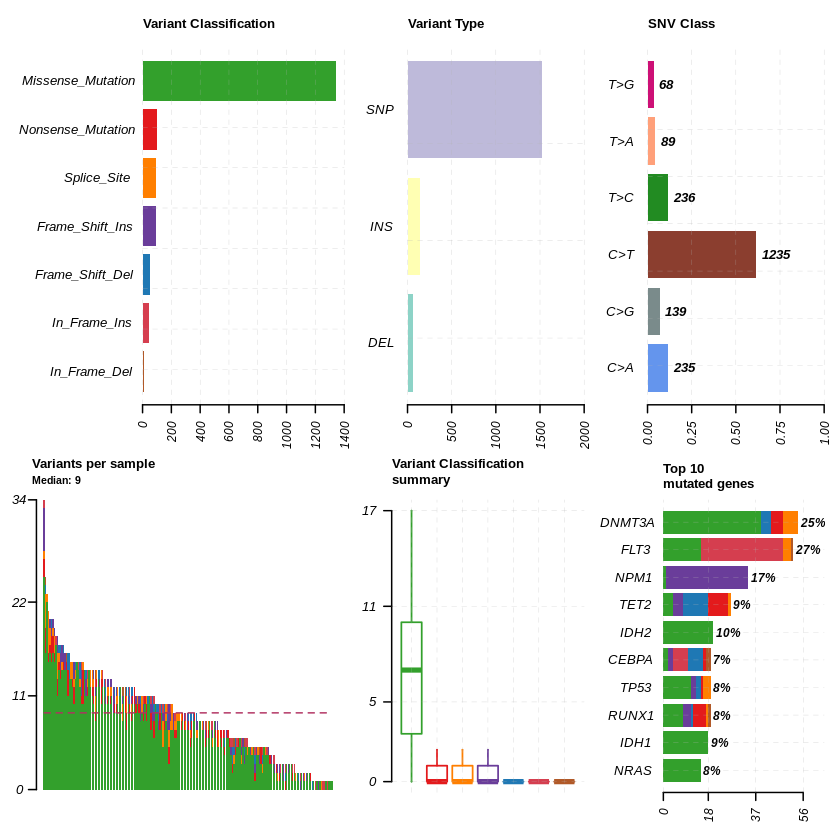

In [54]:
plotmafSummary(maf = maf_obj, rmOutlier = TRUE, addStat = 'median', dashboard = TRUE, titvRaw = FALSE)

### Drawing oncoplots

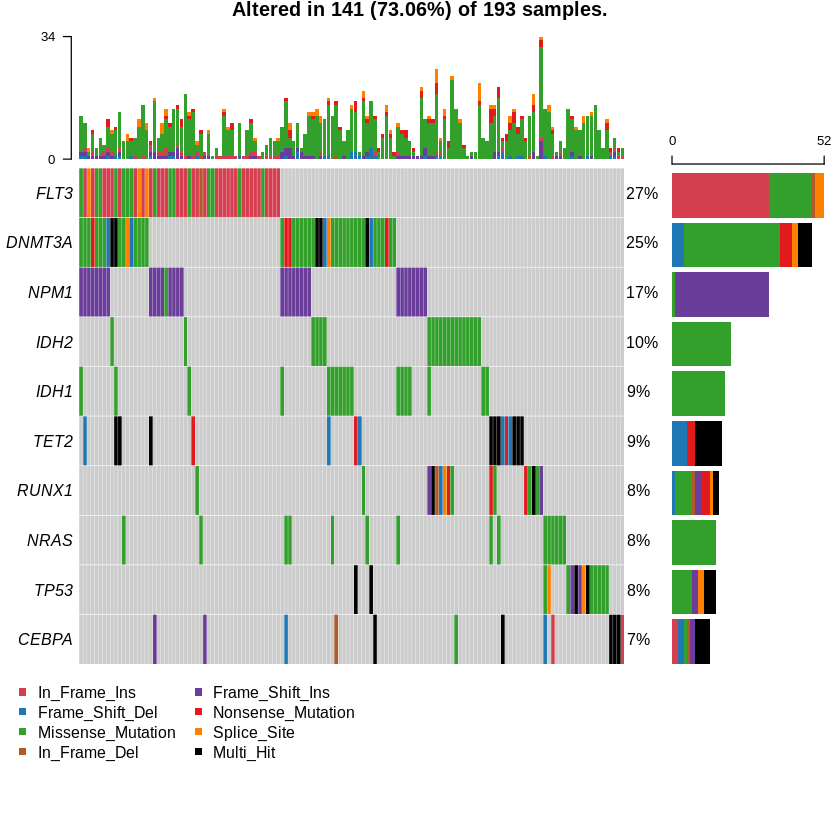

In [55]:
oncoplot(maf = maf_obj, top = 10)

### Lollipop plots for amino acid changes

3 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



     HGNC refseq.ID protein.ID aa.length
1: DNMT3A NM_175629  NP_783328       912
2: DNMT3A NM_022552  NP_072046       912
3: DNMT3A NM_153759  NP_715640       723


Using longer transcript NM_175629 for now.

Removed 3 mutations for which AA position was not available



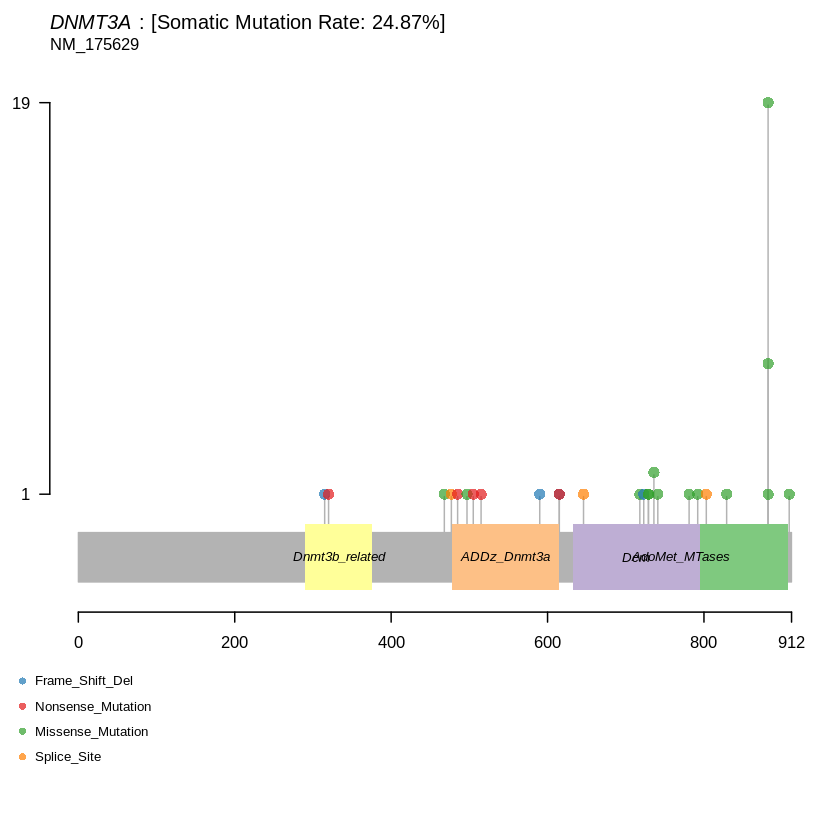

In [57]:
lollipopPlot(maf = maf_obj, gene = 'DNMT3A', AACol = 'Protein_Change', showMutationRate = TRUE)

### Somatic Interactions

gene1,gene2,pValue,oddsRatio,00,11,01,10,Event,pair,event_ratio
<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
IDH2,RUNX1,0.0002809928,9.5908774,164,7,9,13,Co_Occurence,"IDH2, RUNX1",7/22
FLT3,NPM1,0.0009929836,3.7631606,125,17,16,35,Co_Occurence,"FLT3, NPM1",17/51
DNMT3A,NPM1,0.0014582861,3.7331407,128,16,17,32,Co_Occurence,"DNMT3A, NPM1",16/49
IDH1,DNMT3A,0.0033807043,4.4622015,137,10,38,8,Co_Occurence,"DNMT3A, IDH1",10/46
FLT3,TP53,0.0125113481,0.0000000,126,0,15,52,Mutually_Exclusive,"FLT3, TP53",0/67
IDH2,NPM1,0.0277733049,0.0000000,140,0,33,20,Mutually_Exclusive,"IDH2, NPM1",0/53
DNMT3A,FLT3,0.0630630121,1.9514757,111,18,34,30,Co_Occurence,"DNMT3A, FLT3",18/64
CEBPA,NRAS,0.0678045968,4.1492588,168,3,12,10,Co_Occurence,"CEBPA, NRAS",3/22
RUNX1,FLT3,0.0740850163,0.1656920,126,1,51,15,Mutually_Exclusive,"FLT3, RUNX1",1/66


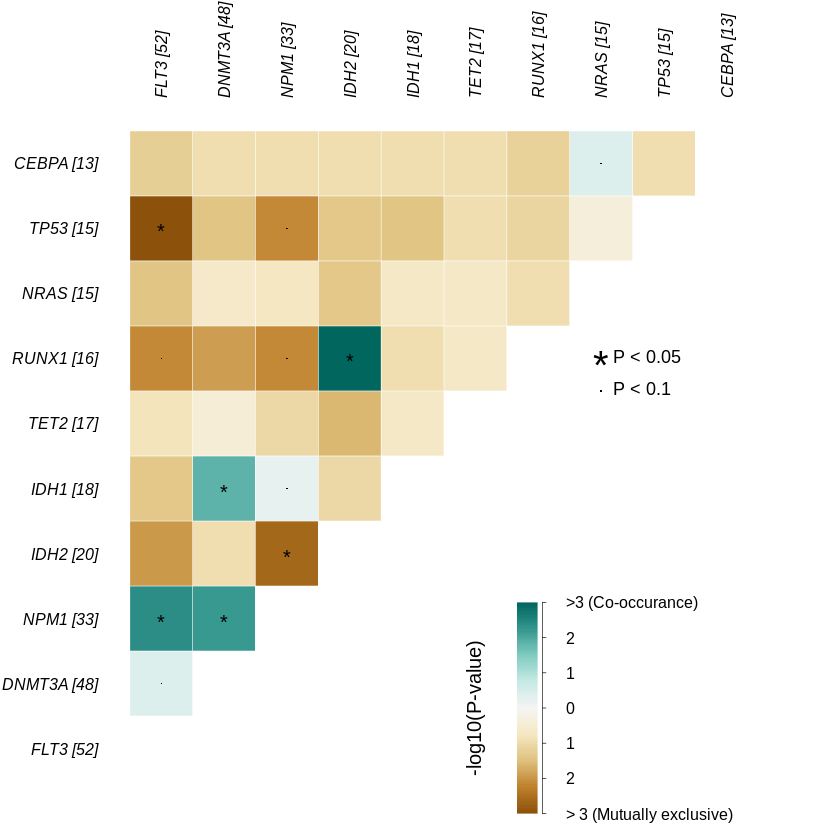

In [59]:
somaticInteractions(maf = maf_obj, top = 10, pvalue = c(0.05, 0.1))

### Oncogenic Signaling Pathways

Pathway alteration fractions



       Pathway  N n_affected_genes fraction_affected
 1:    RTK-RAS 85               18        0.21176471
 2:      Hippo 38                7        0.18421053
 3:      NOTCH 71                6        0.08450704
 4:        MYC 13                3        0.23076923
 5:        WNT 68                3        0.04411765
 6:       TP53  6                2        0.33333333
 7:       NRF2  3                1        0.33333333
 8:       PI3K 29                1        0.03448276
 9: Cell_Cycle 15                0        0.00000000
10:   TGF-Beta  7                0        0.00000000


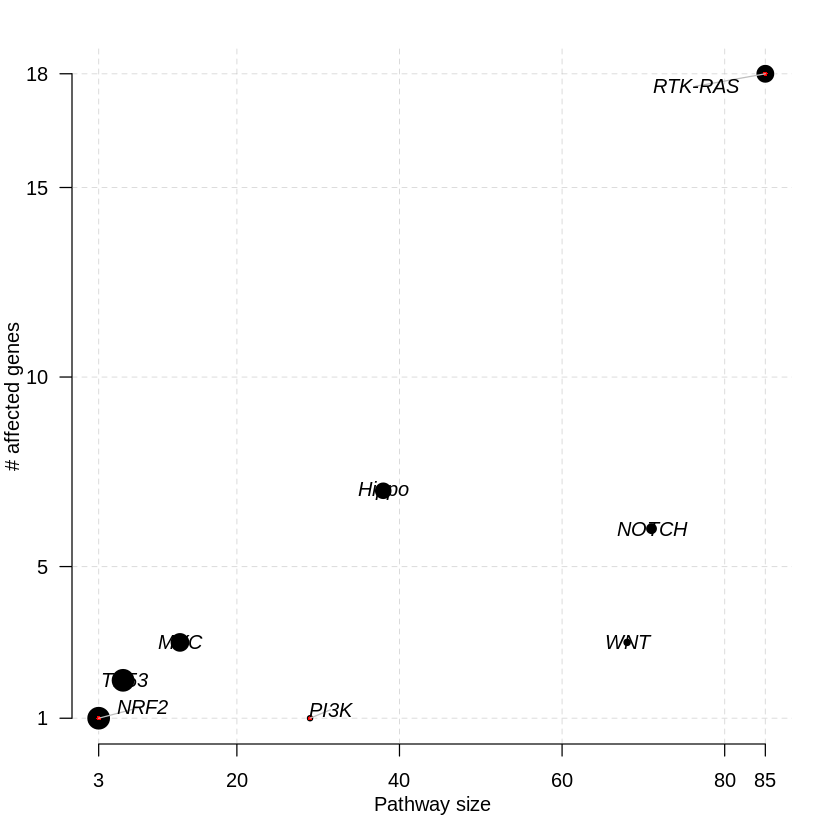

In [60]:
OncogenicPathways(maf = maf_obj)

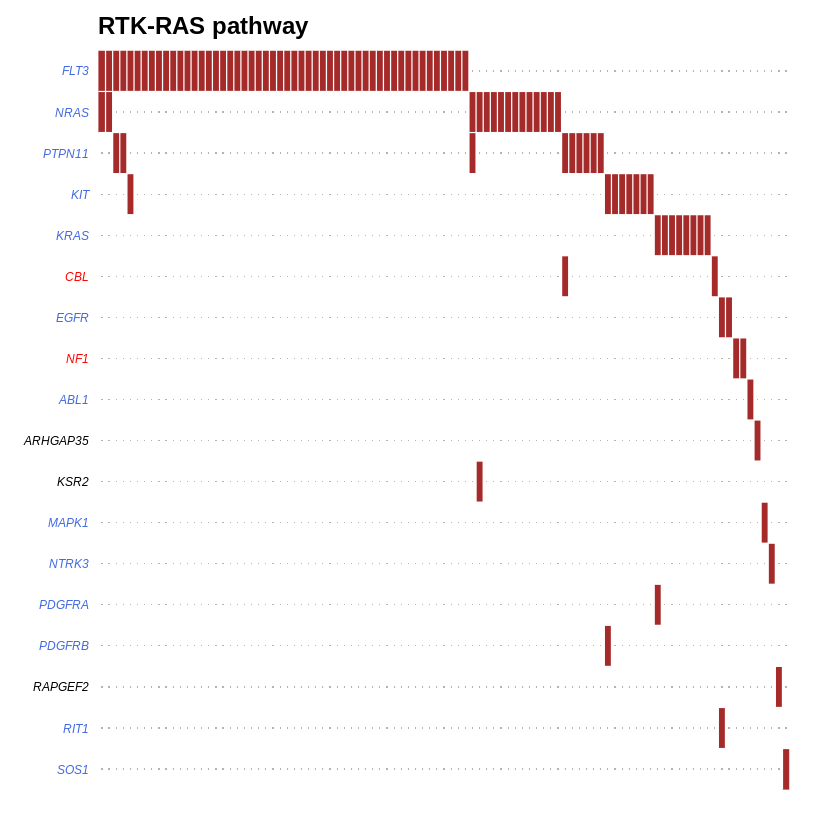

In [62]:
PlotOncogenicPathways(maf = maf_obj, pathways = "RTK-RAS")